Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
    

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
!ls gdrive/MyDrive/data_ml/

Test  Train


In [63]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/MyDrive/data_ml/Train")
data_dir_test = pathlib.Path('gdrive/MyDrive/data_ml/Test')

In [64]:
data_dir_test

PosixPath('gdrive/MyDrive/data_ml/Test')

# New Section

In [66]:
len(list(data_dir_test.glob('*.jpg')))

0

In [32]:
image_count_train = len(list(data_dir_train.glob('*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*.jpg')))
print(image_count_test)


438
16


In [28]:
### Load using keras.preprocessing

#Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [29]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 90 files belonging to 3 classes.
Using 72 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 90 files belonging to 3 classes.
Using 18 files for validation.


In [37]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['.ipynb_checkpoints', 'class1', 'class2']


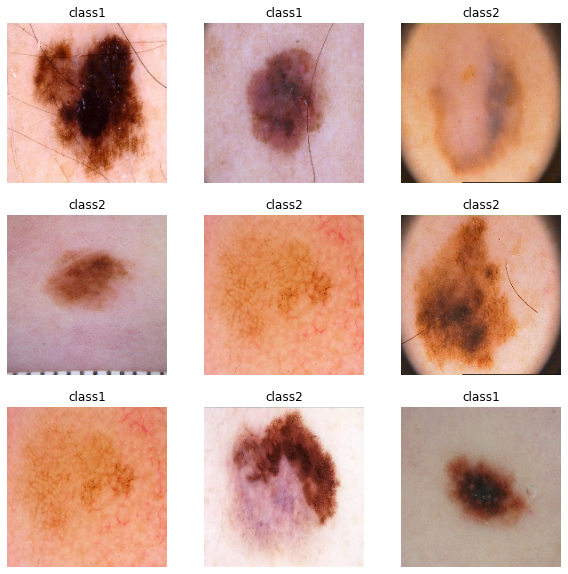

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [40]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [41]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [43]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
3/3 [==============================] - 4s 864ms/step - loss: 1.7264 - accuracy: 0.2778 - val_loss: 0.6995 - val_accuracy: 0.5556
Epoch 2/20
3/3 [==============================] - 3s 737ms/step - loss: 0.8982 - accuracy: 0.4306 - val_loss: 0.8975 - val_accuracy: 0.4444
Epoch 3/20
3/3 [==============================] - 2s 569ms/step - loss: 0.7829 - accuracy: 0.5694 - val_loss: 0.8105 - val_accuracy: 0.3889
Epoch 4/20
3/3 [==============================] - 2s 562ms/step - loss: 0.7408 - accuracy: 0.4306 - val_loss: 0.7825 - val_accuracy: 0.4444
Epoch 5/20
3/3 [==============================] - 2s 844ms/step - loss: 0.6789 - accuracy: 0.5972 - val_loss: 0.7569 - val_accuracy: 0.4444
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 0.6626 - accuracy: 0.6111 - val_loss: 0.7634 - val_accuracy: 0.4444
Epoch 7/20
3/3 [==============================] - 2s 885ms/step - loss: 0.6595 - accuracy: 0.5139 - val_loss: 0.7855 - val_accuracy: 0.4444
Epoch 8/20
3/3 [=======

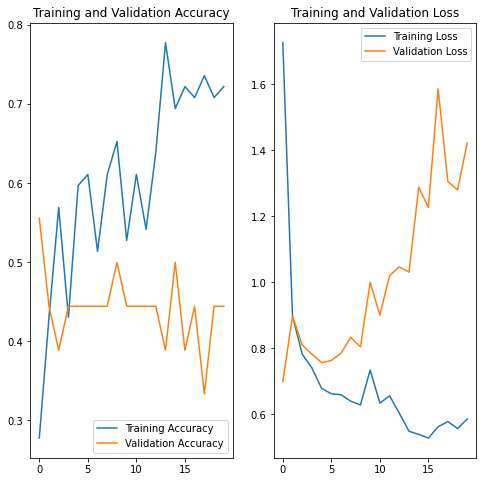

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

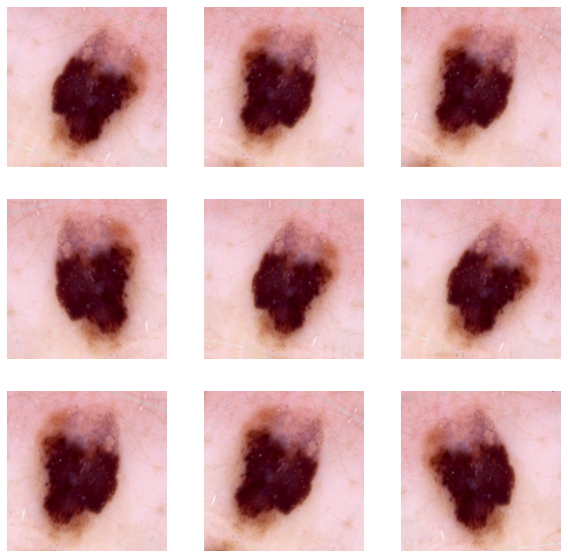

In [46]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



In [48]:

## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


3/3 [==============================] - 7s 789ms/step - loss: 1.8265 - accuracy: 0.3056 - val_loss: 0.9173 - val_accuracy: 0.5556
Epoch 2/20
3/3 [==============================] - 2s 646ms/step - loss: 1.0089 - accuracy: 0.4444 - val_loss: 0.9459 - val_accuracy: 0.4444
Epoch 3/20
3/3 [==============================] - 2s 644ms/step - loss: 0.8077 - accuracy: 0.5694 - val_loss: 0.8363 - val_accuracy: 0.4444
Epoch 4/20
3/3 [==============================] - 2s 640ms/step - loss: 0.7220 - accuracy: 0.5694 - val_loss: 0.6847 - val_accuracy: 0.6111
Epoch 5/20
3/3 [==============================] - 2s 753ms/step - loss: 0.6790 - accuracy: 0.5972 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 3s 827ms/step - loss: 0.6755 - accuracy: 0.5972 - val_loss: 0.7728 - val_accuracy: 0.6111
Epoch 7/20
3/3 [==============================] - 2s 963ms/step - loss: 0.6375 - accuracy: 0.6667 - val_loss: 0.7577 - val_accuracy: 0.5000
Epoch 8/20
3/3 [===============

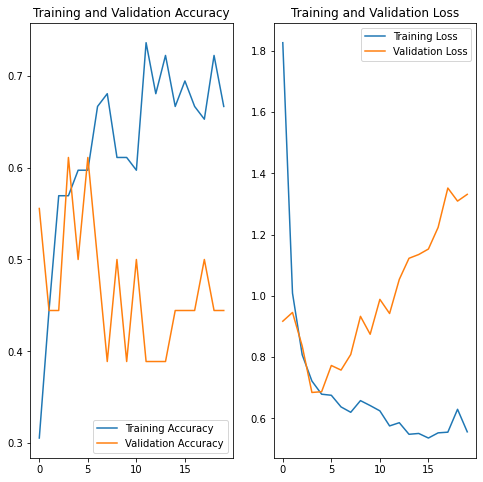

In [50]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
## There is an improvement in the model now

In [52]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

90

In [53]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,gdrive/MyDrive/data_ml/Train/class1/ISIC_00001...,class1
1,gdrive/MyDrive/data_ml/Train/class1/ISIC_00001...,class1
2,gdrive/MyDrive/data_ml/Train/class1/ISIC_00001...,class1
3,gdrive/MyDrive/data_ml/Train/class1/ISIC_00001...,class1
4,gdrive/MyDrive/data_ml/Train/class1/ISIC_00001...,class1
...,...,...
85,gdrive/MyDrive/data_ml/Train/class2/ISIC_00003...,class2
86,gdrive/MyDrive/data_ml/Train/class2/ISIC_00003...,class2
87,gdrive/MyDrive/data_ml/Train/class2/ISIC_00003...,class2
88,gdrive/MyDrive/data_ml/Train/class2/ISIC_00003...,class2


Class=0, n=49 (54.444%)
Class=1, n=41 (45.556%)


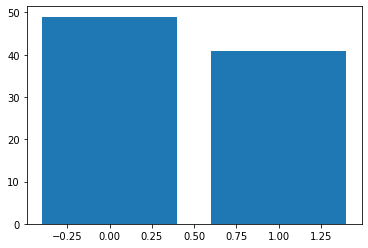

In [54]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()